In [1]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt 

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

/opt/anaconda3/envs/python_course/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
import seaborn as sns

In [3]:
df_DA_US = df[(df['job_title_short'] == 'Data Analyst') & (df['job_country'] == 'United States')].copy()

df_DA_US = df_DA_US.dropna(subset = ['salary_year_avg'])

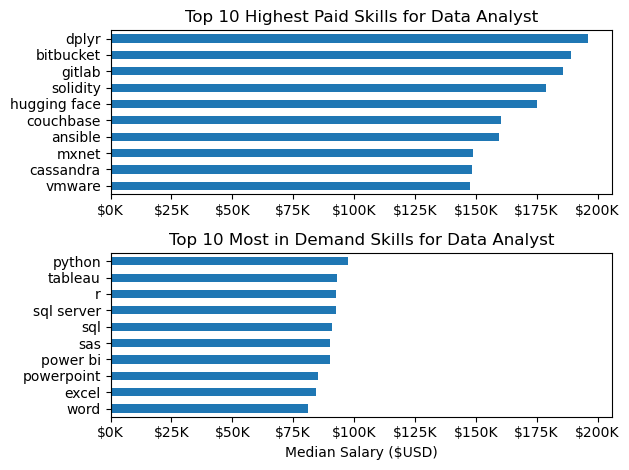

In [4]:
df_DA_US = df_DA_US.explode('job_skills')
df_DA_US_group = df_DA_US.groupby('job_skills')['salary_year_avg'].agg(['count', 'median'])

df_DA_US_top_pay = df_DA_US_group.sort_values(by = 'median', ascending = False).head(10)
df_DA_US_skills = df_DA_US_group.sort_values(by = 'count', ascending = False).head(10).sort_values(by = 'median', ascending = False)

fig, ax = plt.subplots(2,1)

df_DA_US_top_pay[: :-1].plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)
ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

df_DA_US_skills[: :-1].plot(kind = 'barh', y = 'median', ax = ax[1], legend = False)
ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most in Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
fig.tight_layout()
plt.show()

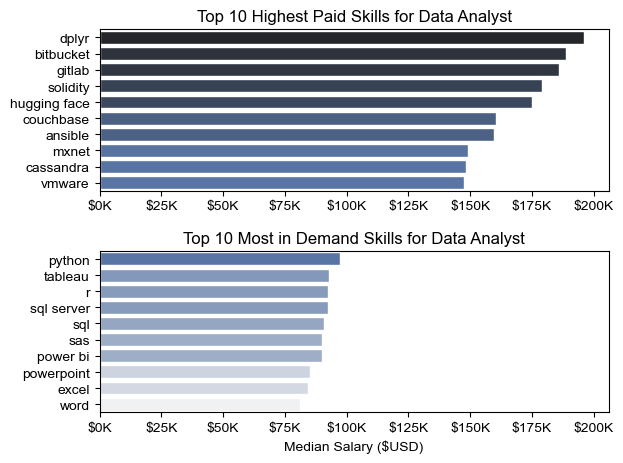

In [11]:
fig, ax = plt.subplots(2,1)
sns.set_theme(style = 'ticks')

#df_DA_US_top_pay[: :-1].plot(kind = 'barh', y = 'median', ax = ax[0], legend = False)

sns.barplot(data = df_DA_US_top_pay, x = 'median', y = df_DA_US_top_pay.index, ax = ax[0], hue = 'median', palette = 'dark:b_r')
ax[0].legend().remove()

ax[0].set_title('Top 10 Highest Paid Skills for Data Analyst')
ax[0].set_ylabel('')
ax[0].set_xlabel('')
ax[0].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

#df_DA_US_skills[: :-1].plot(kind = 'barh', y = 'median', ax = ax[1], legend = False)

sns.barplot(data = df_DA_US_skills, x = 'median', y = df_DA_US_skills.index, ax = ax[1], hue = 'median', palette = 'light:b')
ax[1].legend().remove()

ax[1].set_xlim(ax[0].get_xlim())
ax[1].set_title('Top 10 Most in Demand Skills for Data Analyst')
ax[1].set_ylabel('')
ax[1].set_xlabel('Median Salary ($USD)')
ax[1].xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
fig.tight_layout()
plt.show()

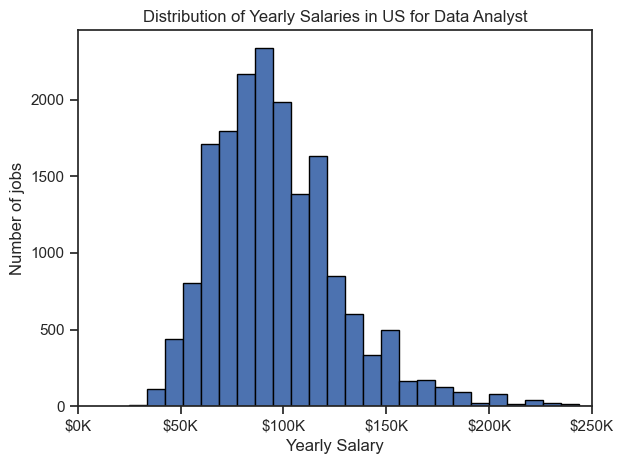

In [12]:
df_DA_US['salary_year_avg'].plot(kind = 'hist', bins = 40, edgecolor = 'black')
plt.xlim(0, 250000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlabel('Yearly Salary')
plt.ylabel('Number of jobs')
plt.title('Distribution of Yearly Salaries in US for Data Analyst')
plt.tight_layout()
plt.show()

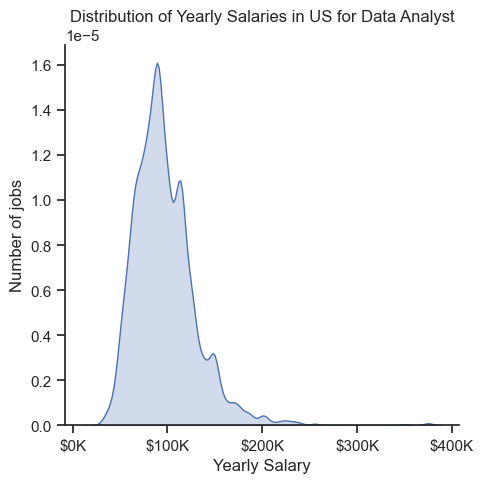

In [15]:
sns.displot(df_DA_US['salary_year_avg'], kind = 'kde', fill = True)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlabel('Yearly Salary')
plt.ylabel('Number of jobs')
plt.title('Distribution of Yearly Salaries in US for Data Analyst')
plt.tight_layout()
plt.show()

/var/folders/rx/g_7y2v794k5cn91ncfww9jf00000gn/T/ipykernel_57737/3550556408.py:6: MatplotlibDeprecationWarning: The 'labels' parameter of boxplot() has been renamed 'tick_labels' since Matplotlib 3.9; support for the old name will be dropped in 3.11.
  plt.boxplot(job_list, labels = job_titles, vert = False)


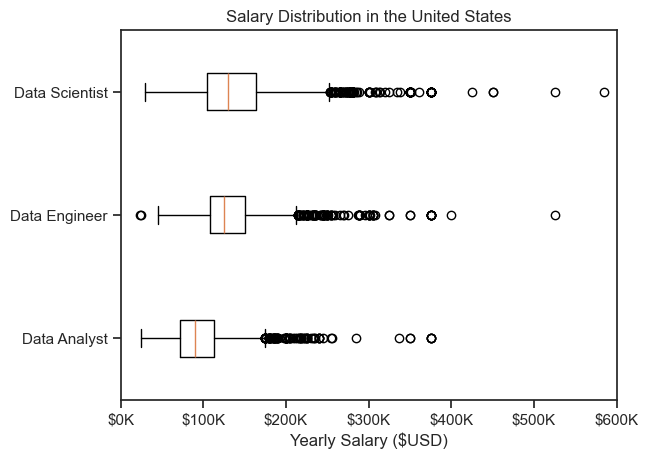

In [16]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_US = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'United States')].copy()
df_US = df_US.dropna(subset=['salary_year_avg'])
job_list = [df_US[df_US['job_title_short'] == job_title]['salary_year_avg'] for job_title in job_titles]
plt.boxplot(job_list, labels = job_titles, vert = False)
plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

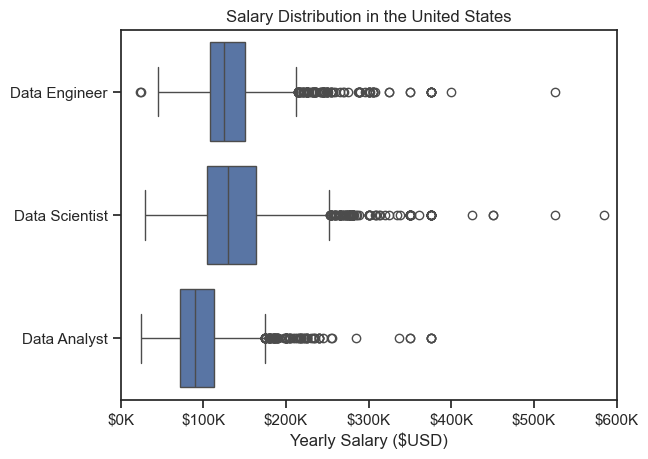

In [18]:
sns.boxplot(data = df_US, x = 'salary_year_avg', y = 'job_title_short')

plt.title('Salary Distribution in the United States')
plt.xlabel('Yearly Salary ($USD)')
plt.ylabel('')
ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.xlim(0, 600000)
plt.show()

In [23]:
df_DS_US = df[(df['job_title_short'] == 'Data Scientist') & (df['job_country'] == 'United States')].copy()

df_DS_US = df_DS_US.dropna(subset = ['salary_year_avg'])

In [35]:
df_DS_US_group = df_DS_US.groupby('company_name')['salary_year_avg'].agg(['median'])
df_DS_US_top_pay = df_DS_US_group.sort_values(by = 'median', ascending = False).head(5)

/var/folders/rx/g_7y2v794k5cn91ncfww9jf00000gn/T/ipykernel_57737/1387463430.py:2: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend().remove()


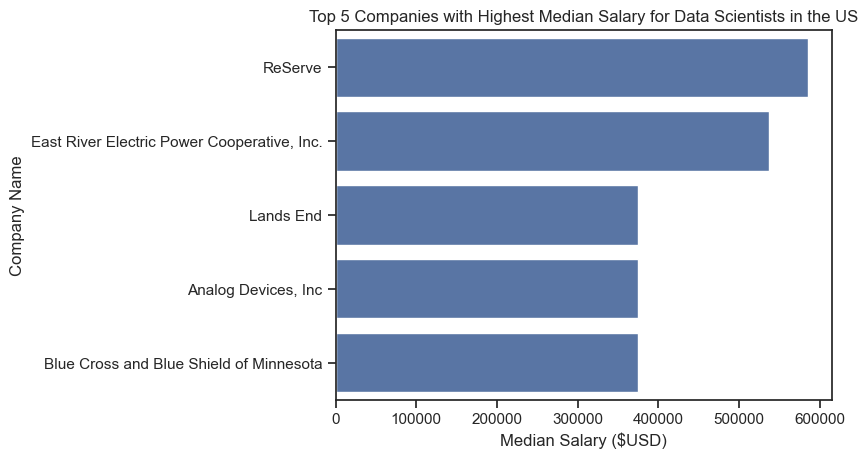

In [40]:
sns.barplot(data = df_DS_US_top_pay, x = 'median', y = df_DS_US_top_pay.index)
plt.legend().remove()

plt.title('Top 5 Companies with Highest Median Salary for Data Scientists in the US')
plt.ylabel('Company Name')
plt.xlabel('Median Salary ($USD)')
#plt.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))
plt.show()

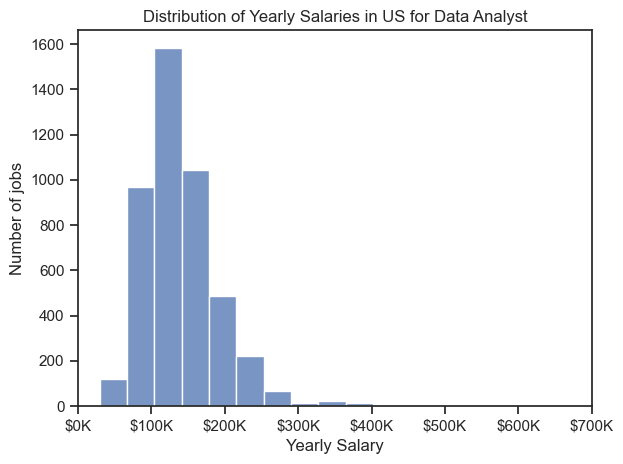

In [42]:
sns.histplot(df_DS_US['salary_year_avg'], bins=25, kde=False)

plt.xlim(0, 700000)

ax = plt.gca()
ax.xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}K'))

plt.xlabel('Yearly Salary')
plt.ylabel('Number of jobs')
plt.title('Distribution of Yearly Salaries in US for Data Analyst')
plt.tight_layout()
plt.show()

In [43]:
job_titles = ['Data Analyst', 'Data Engineer', 'Data Scientist']

df_IN = df[(df['job_title_short'].isin(job_titles)) & (df['job_country'] == 'India')].copy()
df_IN = df_IN.dropna(subset=['salary_year_avg'])

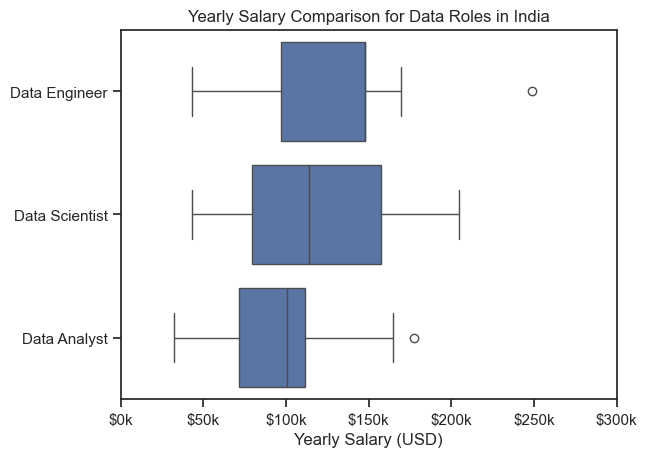

In [46]:
sns.boxplot(data=df_IN, x='salary_year_avg', y='job_title_short')
plt.title('Yearly Salary Comparison for Data Roles in India')
plt.xlabel('Yearly Salary (USD)')
plt.ylabel('')
plt.xlim(0, 300000)
plt.gca().xaxis.set_major_formatter(plt.FuncFormatter(lambda x, pos: f'${int(x/1000)}k'))
plt.show()

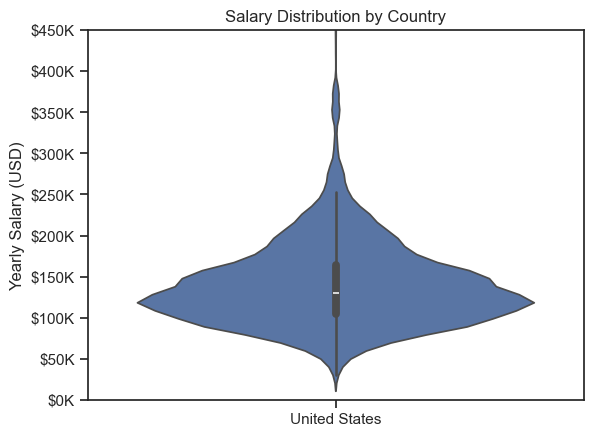

In [47]:
sns.violinplot(x='job_country', y='salary_year_avg', data=df_DS_US)
plt.title('Salary Distribution by Country')
plt.xlabel('')
plt.ylabel('Yearly Salary (USD)')
plt.ylim(0, 450000)  
plt.gca().yaxis.set_major_formatter(plt.FuncFormatter(lambda y, pos: f'${int(y/1000)}K'))
plt.show()